<a href="https://colab.research.google.com/github/Luizfern-coder/Luizfern-coder/blob/main/Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Importação de Dados

import pandas as pd
url = 'https://raw.githubusercontent.com/gitflai/DDS/main/Datasets/churn.csv'
dados = pd.read_csv(url)

dados.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
dados.describe

<bound method NDFrame.describe of       RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumO

In [4]:
#contagem da feature Surname
dados['Surname'].value_counts()

Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: Surname, Length: 2932, dtype: int64

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.1 MB 4.1 MB/s 


                                             |          | [  0%]   00:00 -> (? left)


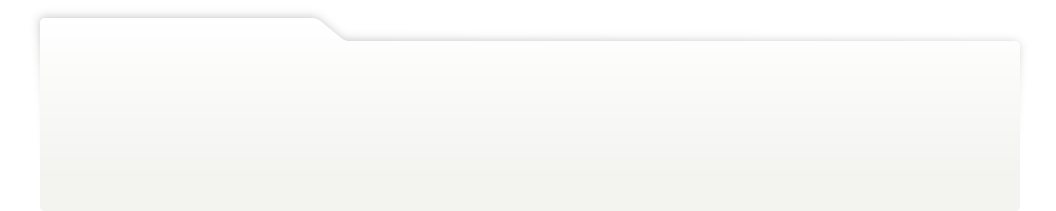
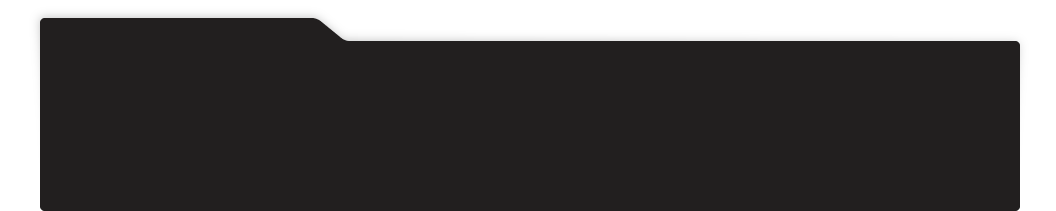
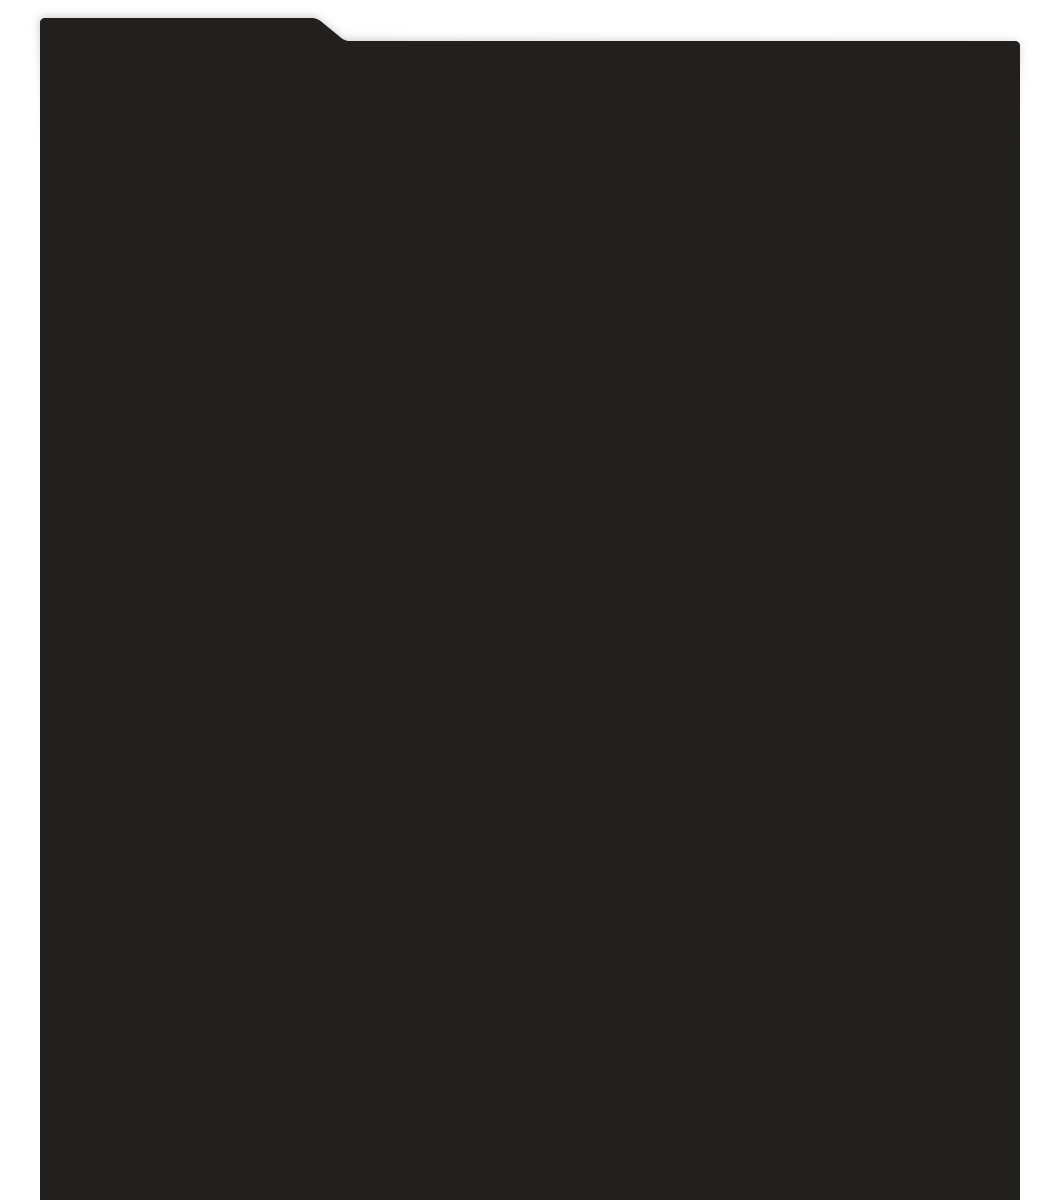
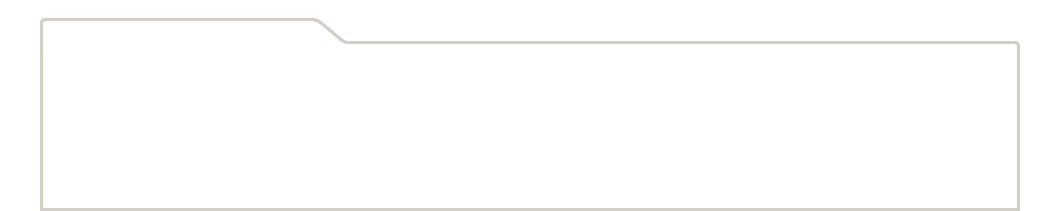
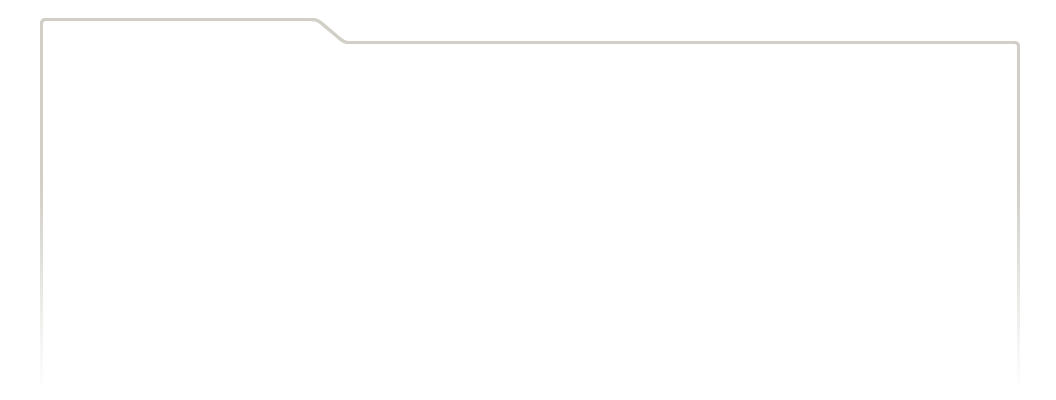
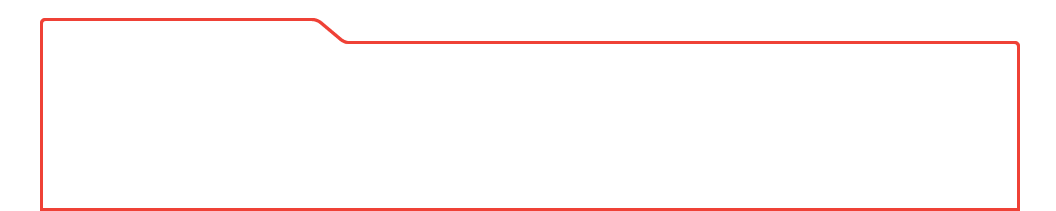
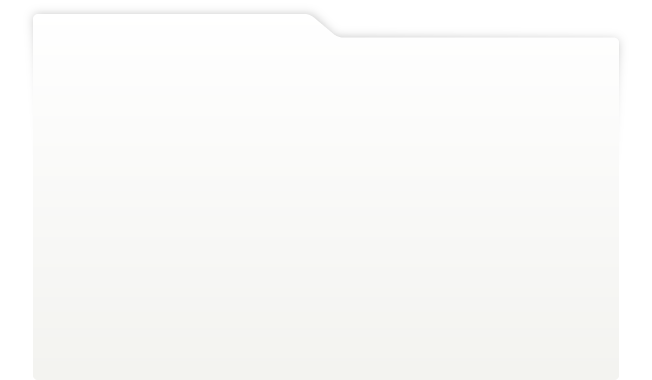
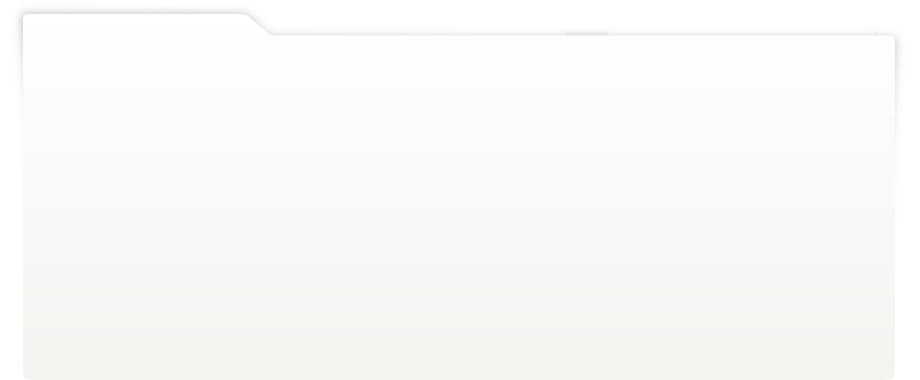
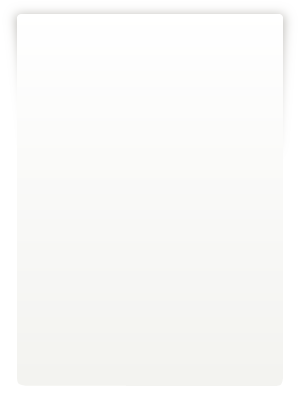
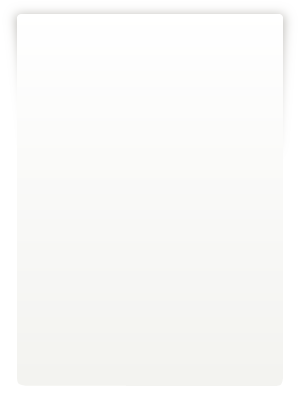
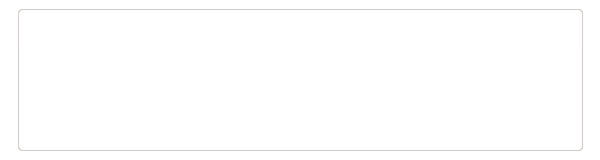
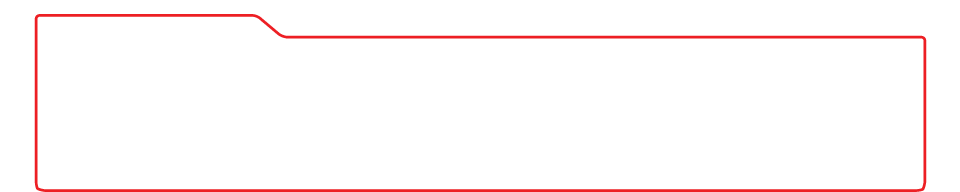
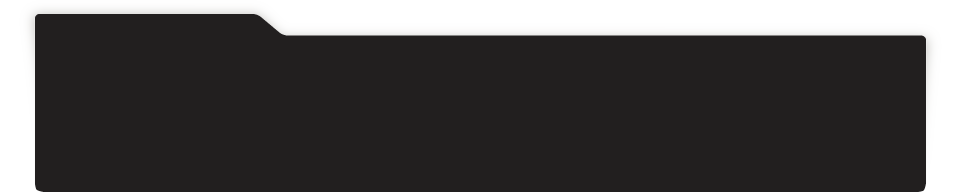
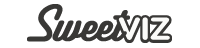
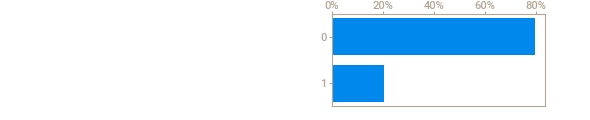
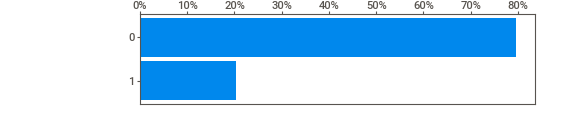
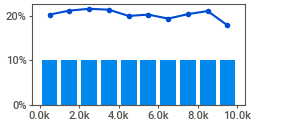
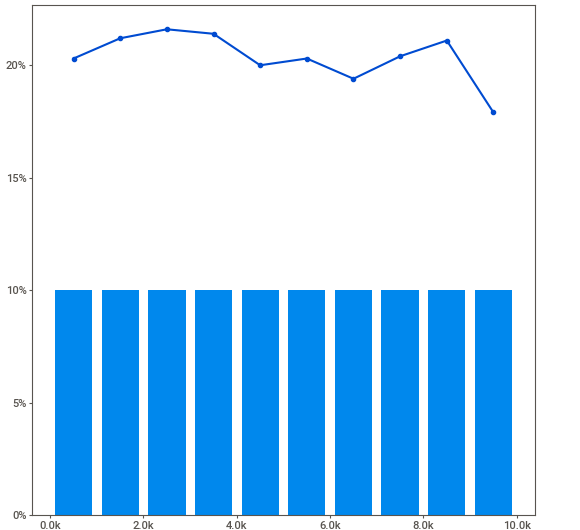
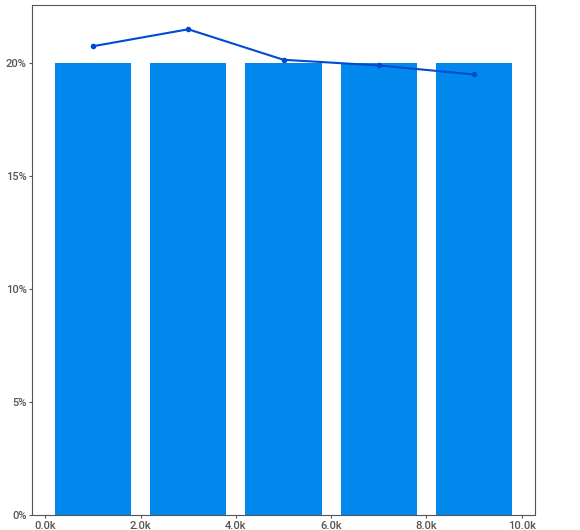
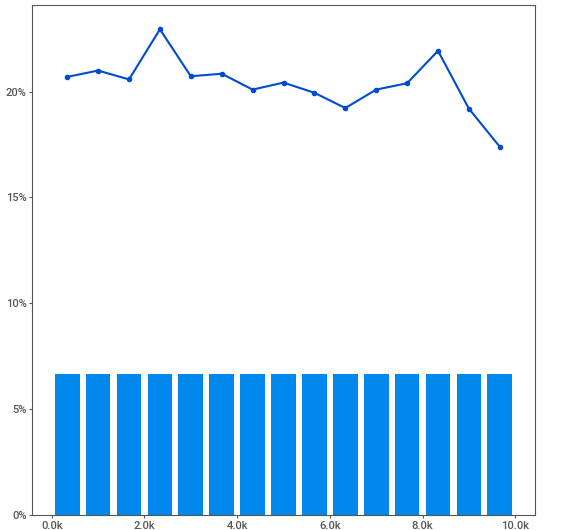
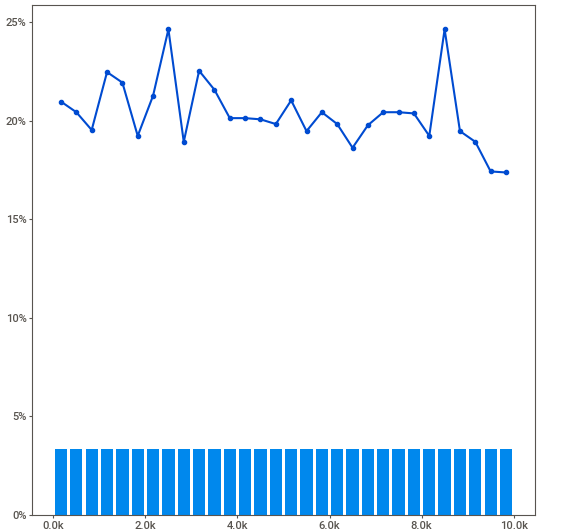
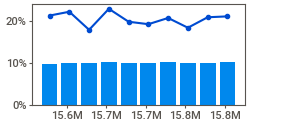
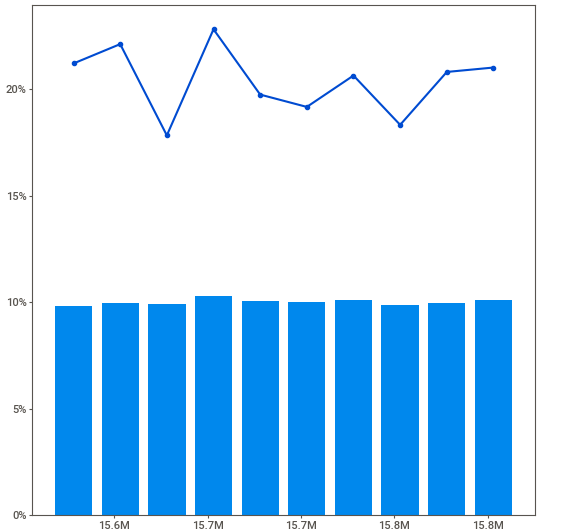
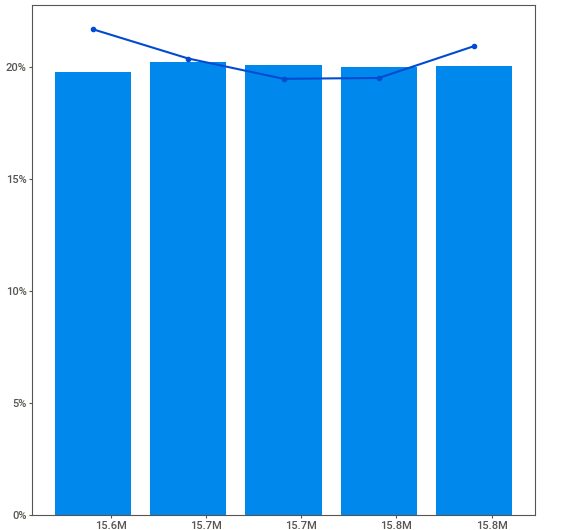
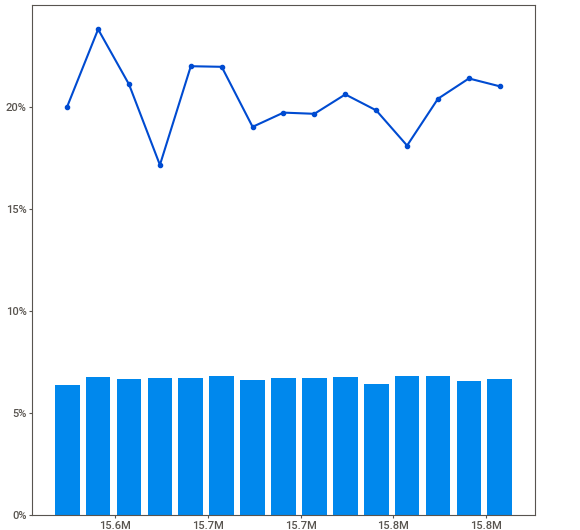
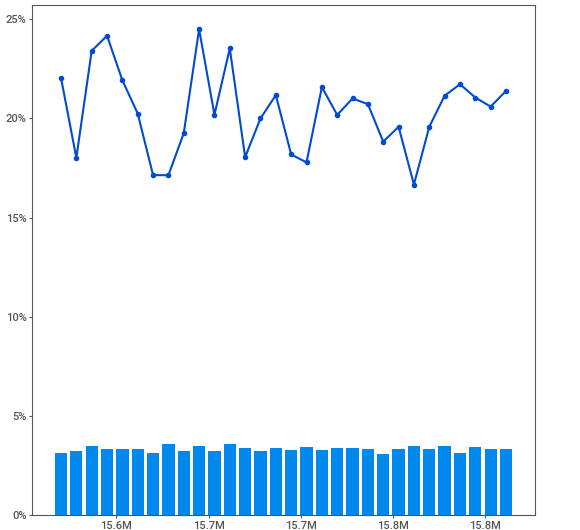
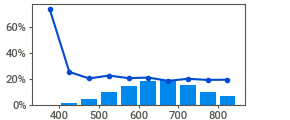
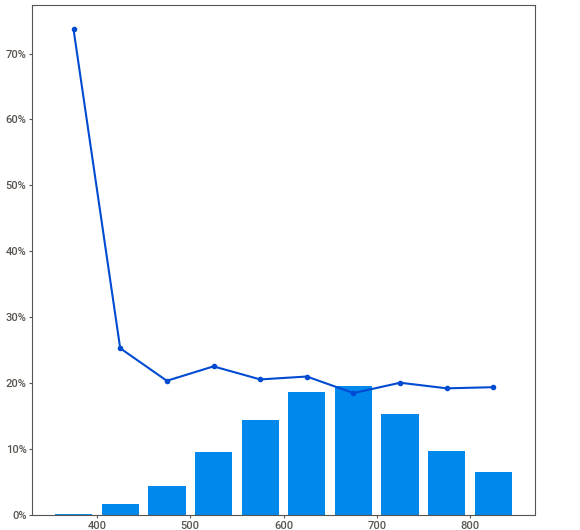
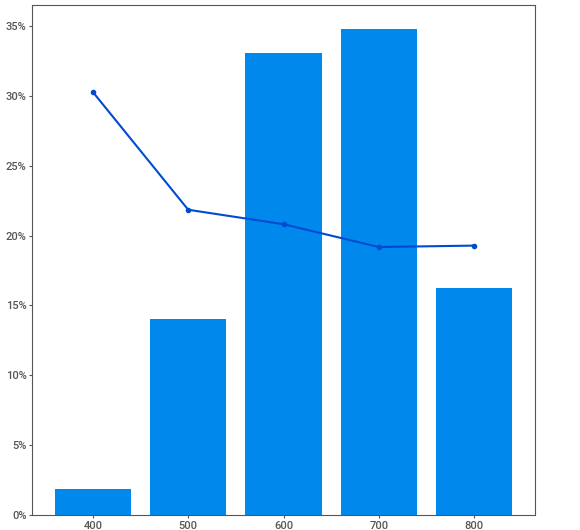
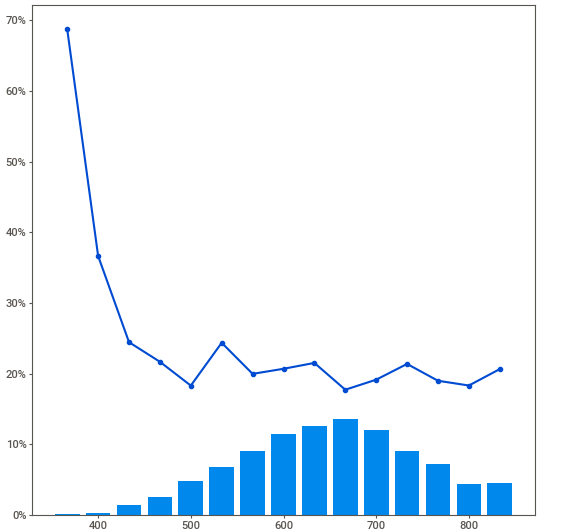
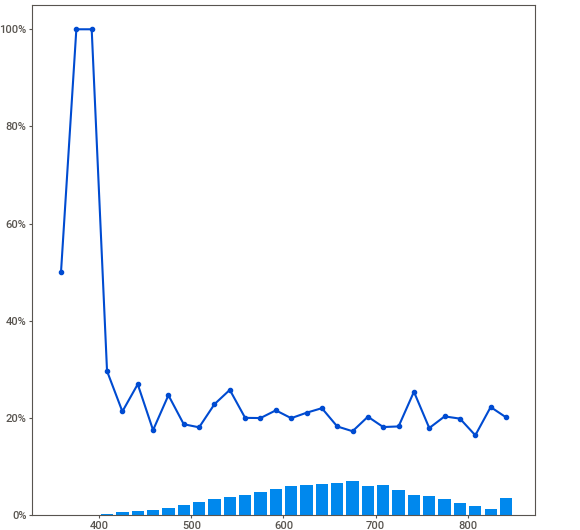
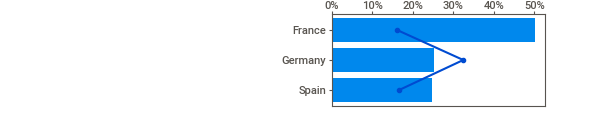
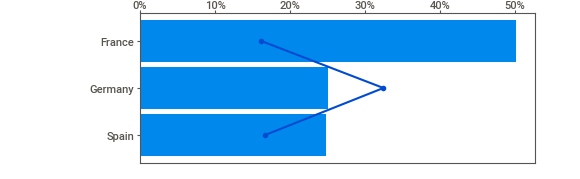
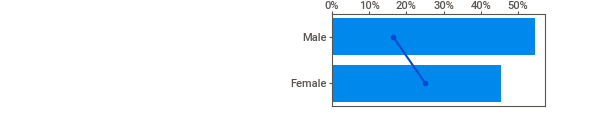
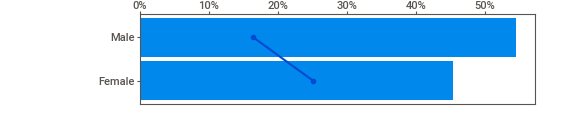
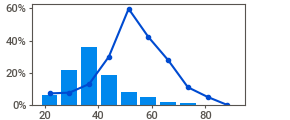
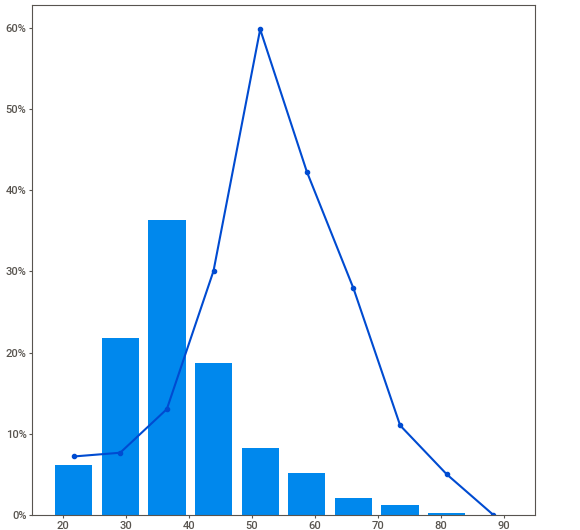
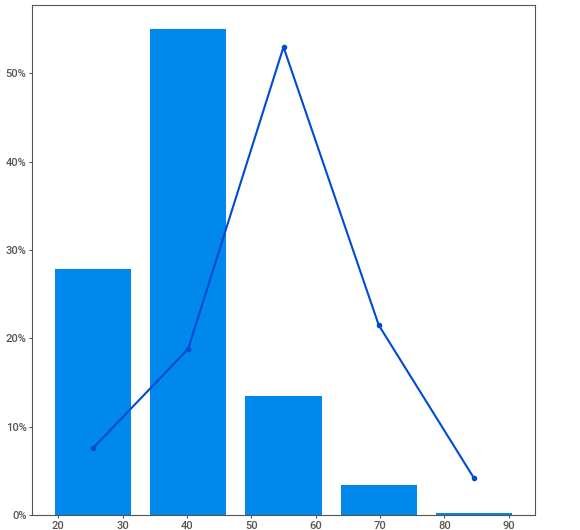
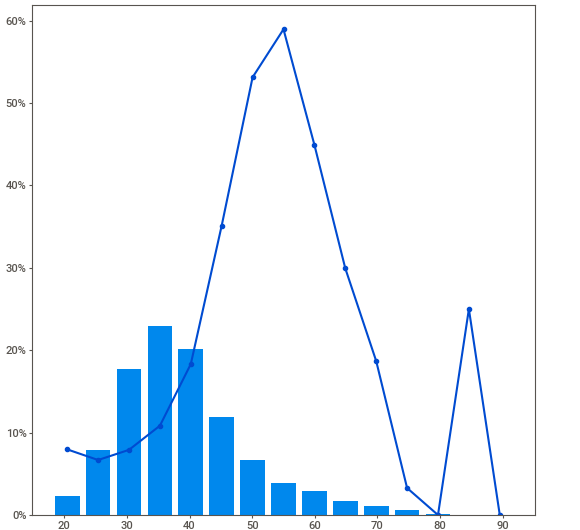
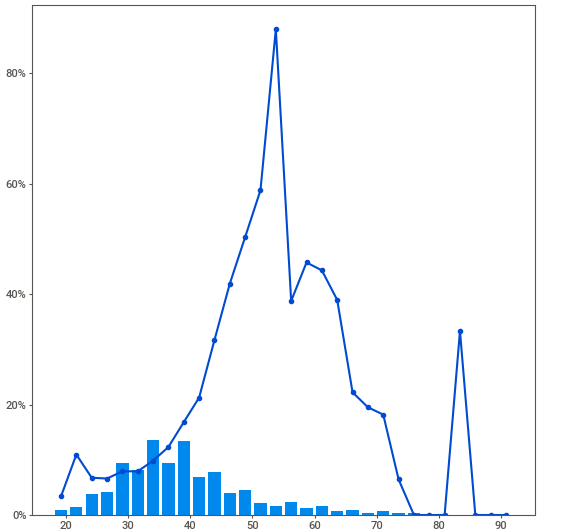
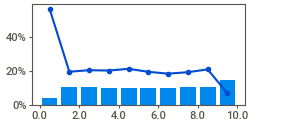
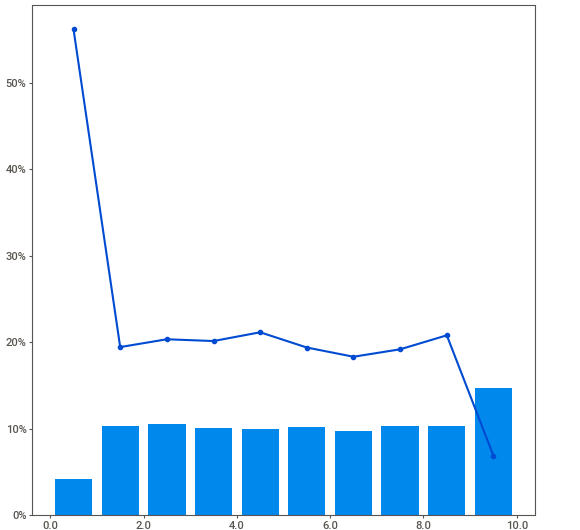
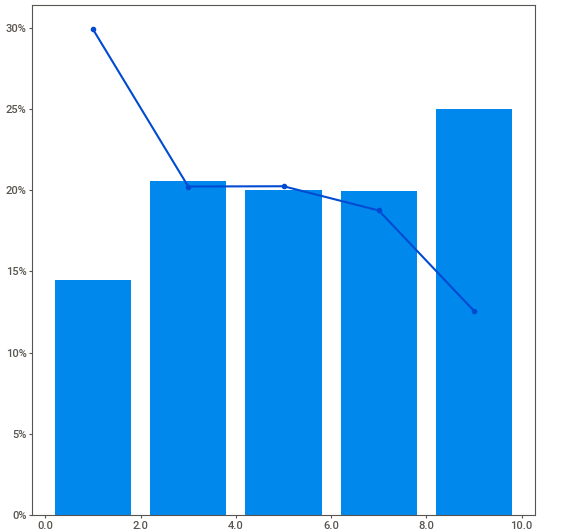
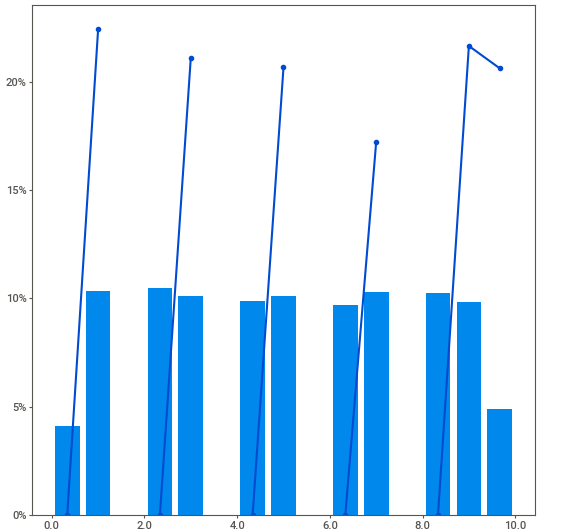
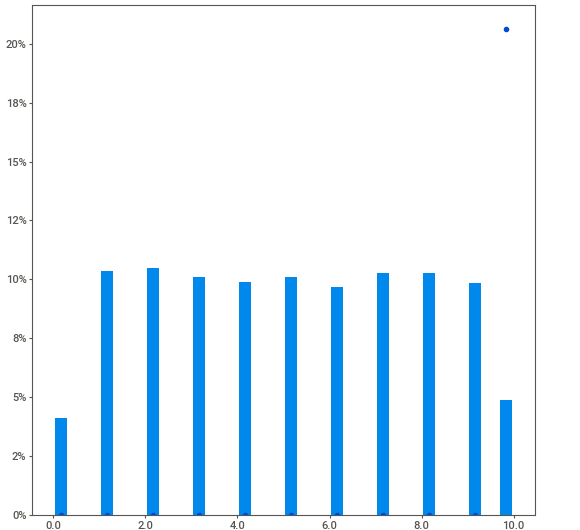
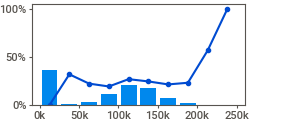
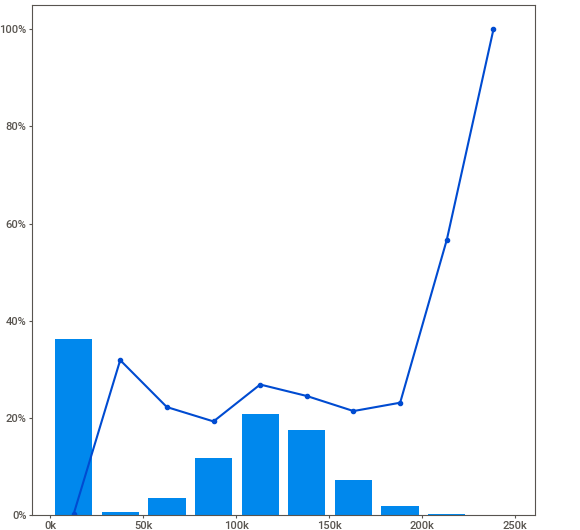
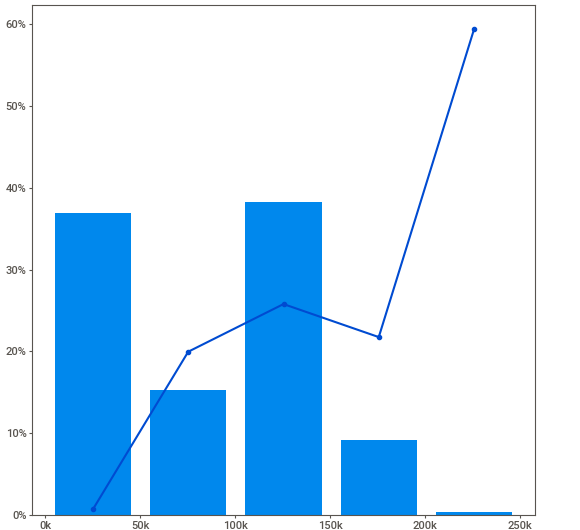
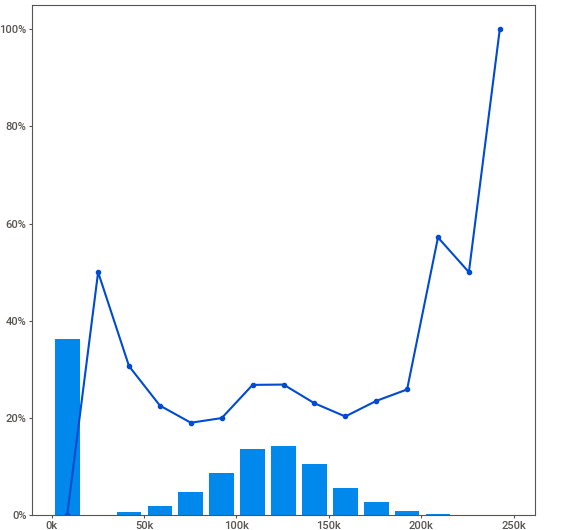
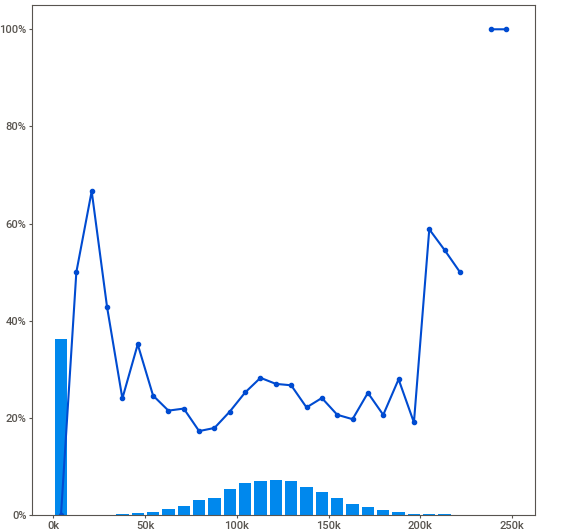
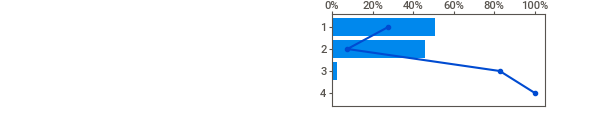
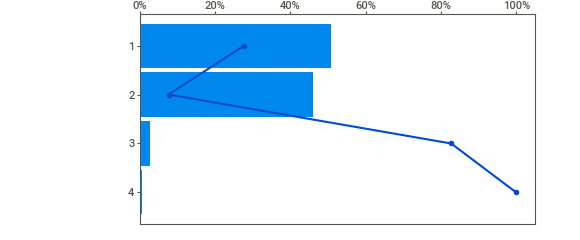
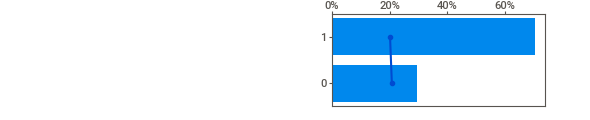
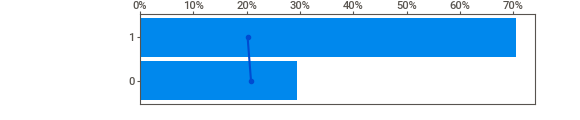
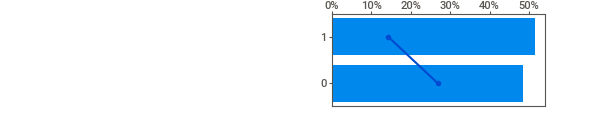
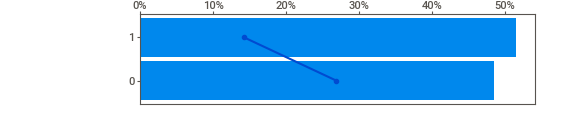
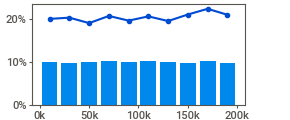
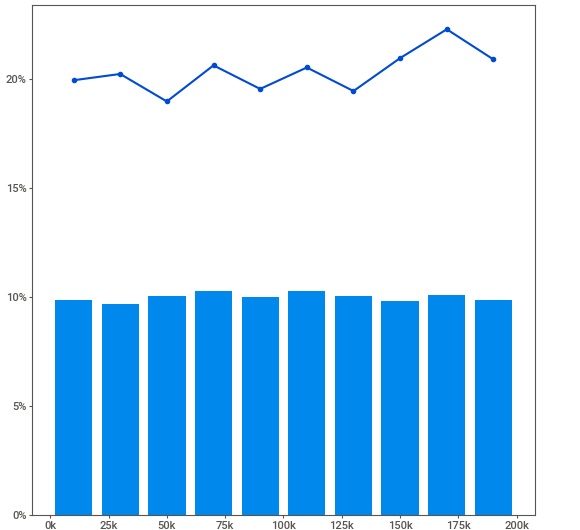
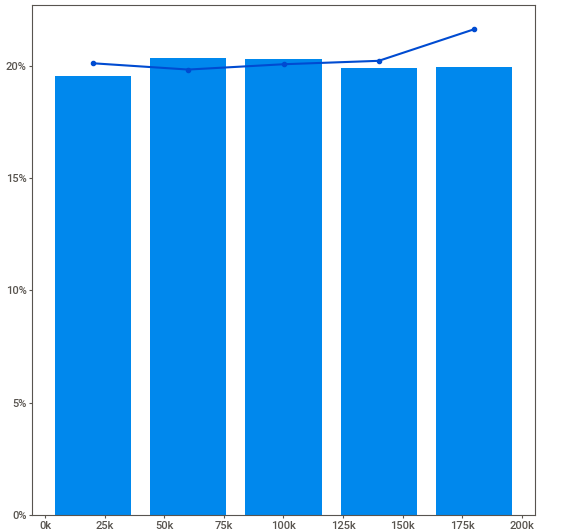
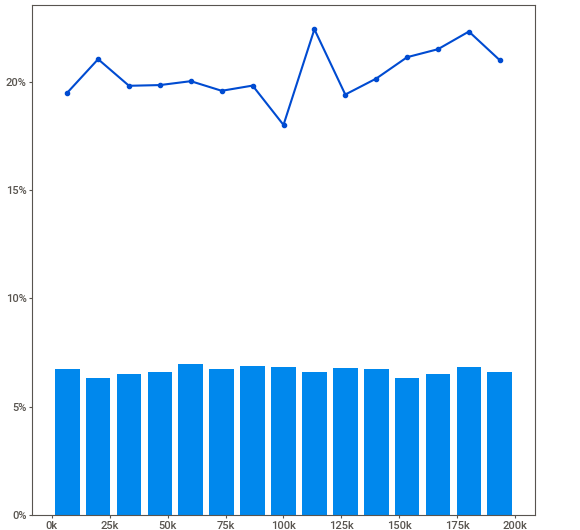
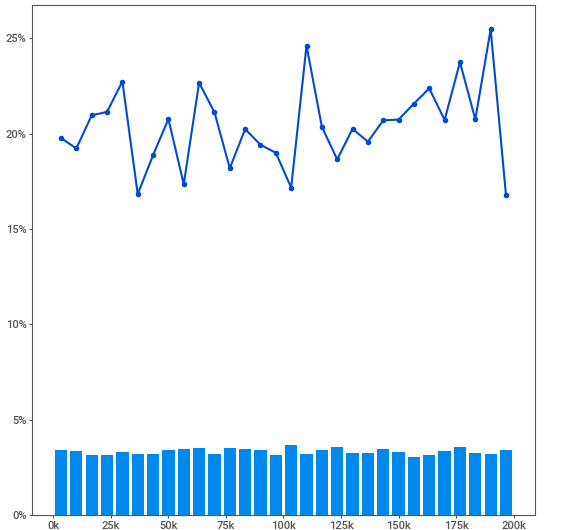
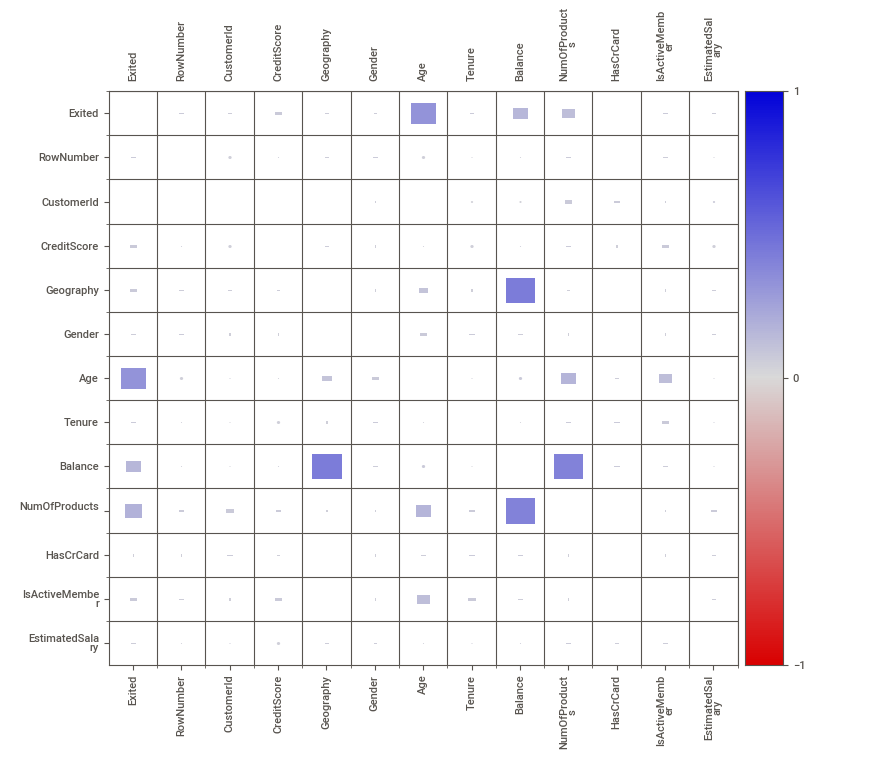
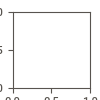

In [4]:
!pip install sweetviz
import sweetviz as sv
eda = sv.analyze(source = dados, target_feat = 'Exited')
eda.show_notebook()

## Pré Processamento para Machine Learning

Em machine learning, é comum utilizarmos conjuntos de dados 100% numéricos para que fique adequeado para qualquer modelo que se deseje utilizar. Isso significa que nao pode haver dados faltantes e nem variaveis do tipo string (ou outros tipos que nao sejam numericos) 

In [5]:
dados.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Descarte de variáveis não importantes

In [6]:
#dropando as variaveis de interesse
dados.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1, inplace = True)

In [7]:
#verificacao de dados faltantes
dados.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
import missingno as missing #visualizacao de dados missing

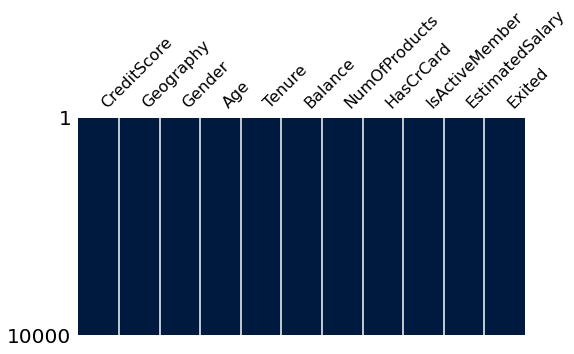

In [10]:
missing.matrix(dados, figsize=(8, 4), color = (0, 0.1, 0.25), sparkline = False)

## Categorização de variaveis continuas

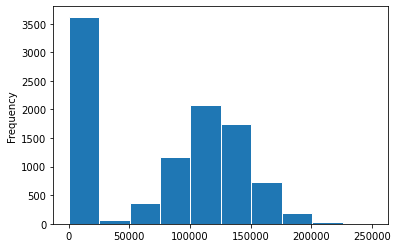

In [11]:
dados['Balance'].plot(kind = 'hist', edgecolor = 'white');

In [12]:
dados[dados['Balance'] > 0]['Balance'].describe() #saldo da conta maior que zero

count      6383.000000
mean     119827.493793
std       30095.056462
min        3768.690000
25%      100181.975000
50%      119839.690000
75%      139512.290000
max      250898.090000
Name: Balance, dtype: float64

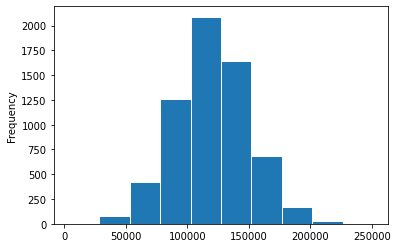

In [13]:
dados[dados['Balance'] > 0 ]['Balance'].plot(kind = 'hist', edgecolor = 'white')

In [14]:
def auxiliar(x):
    if x == 0:
        return 'Zerada'
    elif x < 100000:
        return 'Até 100k'
    elif x < 120000:
        return '100k - 120k'
    elif x < 140000:
        return '120k - 140k'
    else:
        return '140k +'

dados['Balance'] = dados['Balance'].apply(auxiliar)
dados.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,Zerada,1,1,1,101348.88,1
1,608,Spain,Female,41,1,Até 100k,1,0,1,112542.58,0
2,502,France,Female,42,8,140k +,3,1,0,113931.57,1
3,699,France,Female,39,1,Zerada,2,0,0,93826.63,0
4,850,Spain,Female,43,2,120k - 140k,1,1,1,79084.10,0


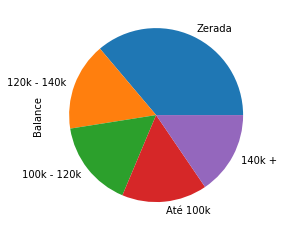

In [15]:
dados['Balance'].value_counts().plot(kind = 'pie');

In [16]:
dados.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,Zerada,1,1,1,101348.88,1
1,608,Spain,Female,41,1,Até 100k,1,0,1,112542.58,0
2,502,France,Female,42,8,140k +,3,1,0,113931.57,1
3,699,France,Female,39,1,Zerada,2,0,0,93826.63,0
4,850,Spain,Female,43,2,120k - 140k,1,1,1,79084.10,0


In [17]:
dados['Tenure'].value_counts()

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64

In [18]:
def auxiliar(x):
    if x == 0:
        return '0-'
    elif x <= 3:
        return '1-3'
    elif x <= 6:
        return '4-6'
    elif x <= 9:
        return '7-9'
    else:
        return '10-'

dados['Tenure'] = dados['Tenure'].apply(auxiliar)

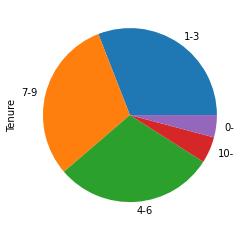

In [19]:
dados['Tenure'].value_counts().plot(kind = 'pie')

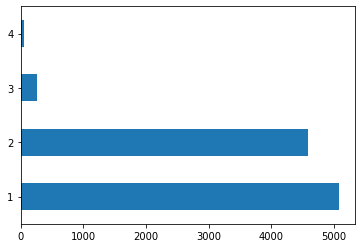

In [20]:
dados['NumOfProducts'].value_counts().plot(kind = 'barh')

In [21]:
def auxiliar(x):
    if x == 1:
        return 'NumProd1'
    else:
        return 'NumProd2+'
dados['NumOfProducts'] = dados['NumOfProducts'].apply(auxiliar)

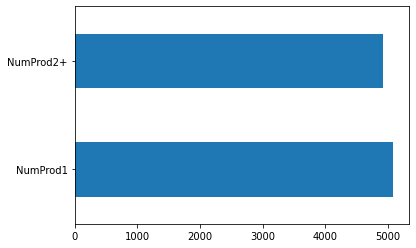

In [22]:
dados['NumOfProducts'].value_counts().plot(kind = 'barh')

In [23]:
dados.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,1-3,Zerada,NumProd1,1,1,101348.88,1
1,608,Spain,Female,41,1-3,Até 100k,NumProd1,0,1,112542.58,0
2,502,France,Female,42,7-9,140k +,NumProd2+,1,0,113931.57,1
3,699,France,Female,39,1-3,Zerada,NumProd2+,0,0,93826.63,0
4,850,Spain,Female,43,1-3,120k - 140k,NumProd1,1,1,79084.10,0


## Dummyficação de Variáveis

In [24]:
pd.get_dummies(dados['Geography'], drop_first= True) #do ponto de vista preditiva, não precisa de muitas colunas, quanto menos melhor

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [25]:
variaveis_cat = ['Geography', 'Gender', 'Tenure', 'Balance', 'NumOfProducts']

dados = pd.get_dummies(dados, columns = variaveis_cat, drop_first= True )

In [26]:
dados.head()

,CreditScore,Age,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male,Tenure_1-3,Tenure_10-,Tenure_4-6,Tenure_7-9,Balance_120k - 140k,Balance_140k +,Balance_Até 100k,Balance_Zerada,NumOfProducts_NumProd2+
0,619,42,1,1,101348.88,1,0,0,0,1,0,0,0,0,0,0,1,0
1,608,41,0,1,112542.58,0,0,1,0,1,0,0,0,0,0,1,0,0
2,502,42,1,0,113931.57,1,0,0,0,0,0,0,1,0,1,0,0,1
3,699,39,0,0,93826.63,0,0,0,0,1,0,0,0,0,0,0,1,1
4,850,43,1,1,79084.10,0,0,1,0,1,0,0,0,1,0,0,0,0


## Escala das Variáveis Continuas

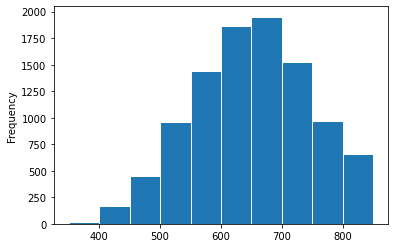

In [27]:
dados['CreditScore'].plot(kind = 'hist', edgecolor = 'white')

In [28]:
dados['CreditScore'] = dados['CreditScore']/1000

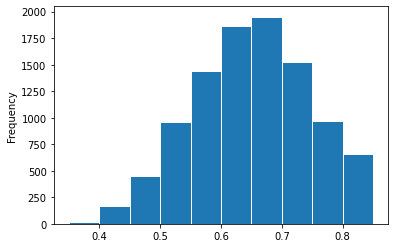

In [29]:
dados['CreditScore'].plot(kind = 'hist', edgecolor = 'white')

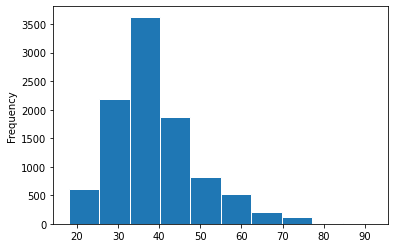

In [30]:
dados['Age'].plot(kind = 'hist', edgecolor = 'white')

In [31]:
#padronizacao 

import numpy as np
media = np.mean(dados['Age'])
desvio = np.std(dados['Age'])

dados['Age'] = (dados['Age']- media)/desvio

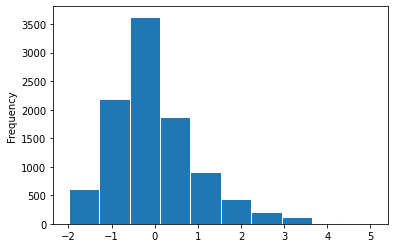

In [32]:
dados['Age'].plot(kind = 'hist', edgecolor = 'white')

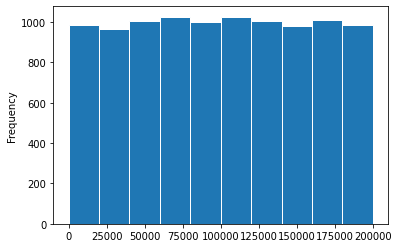

In [33]:
dados['EstimatedSalary'].plot(kind = 'hist', edgecolor = 'white')

In [34]:
dados['EstimatedSalary'].describe()

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: EstimatedSalary, dtype: float64

In [35]:
dados['EstimatedSalary'] = dados['EstimatedSalary']/200000

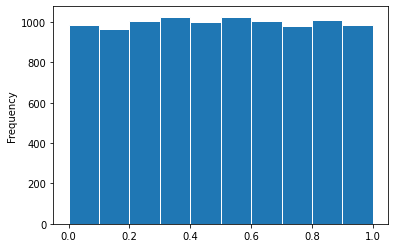

In [36]:
dados['EstimatedSalary'].plot(kind = 'hist', edgecolor = 'white')

In [37]:
dados.head()

,CreditScore,Age,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male,Tenure_1-3,Tenure_10-,Tenure_4-6,Tenure_7-9,Balance_120k - 140k,Balance_140k +,Balance_Até 100k,Balance_Zerada,NumOfProducts_NumProd2+
0,0.619,0.293517,1,1,0.506744,1,0,0,0,1,0,0,0,0,0,0,1,0
1,0.608,0.198164,0,1,0.562713,0,0,1,0,1,0,0,0,0,0,1,0,0
2,0.502,0.293517,1,0,0.569658,1,0,0,0,0,0,0,1,0,1,0,0,1
3,0.699,0.007457,0,0,0.469133,0,0,0,0,1,0,0,0,0,0,0,1,1
4,0.850,0.388871,1,1,0.395421,0,0,1,0,1,0,0,0,1,0,0,0,0


## Machine Learning

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier


In [39]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold

validacao = RepeatedStratifiedKFold(n_splits = 10 , n_repeats = 2)

In [40]:
X = dados.drop('Exited', axis = 1)
y = dados['Exited']

lista_de_medidas = ['accuracy', 'recall', 'precision', 'balanced_accuracy', 'f1']
nome_das_medidas = ['acuracia', 'sensibilidade', 'precisao', 'eficiencia', 'f1-score']

lista_de_modelos = [LogisticRegression(),
                    DecisionTreeClassifier(max_depth = 3),
                        DecisionTreeClassifier(max_depth = 5),
                        DecisionTreeClassifier(max_depth = 7),
                        KNeighborsClassifier(n_neighbors = 5),
                        KNeighborsClassifier(n_neighbors = 15),
                        KNeighborsClassifier(n_neighbors = 25),
                        BaggingClassifier(),
                        RandomForestClassifier(n_estimators=50, max_depth = 5),
                        RandomForestClassifier(n_estimators=50, max_depth = 7),
                        RandomForestClassifier(n_estimators=100, max_depth = 5),
                        RandomForestClassifier(n_estimators=100, max_depth = 7)]


nome_dos_modelos = ['Regressão Logística',
                        'Árvore (prof = 3)',
                        'Árvore (prof = 5)',
                        'Árvore (prof = 7)',
                        '5-NN',
                        '15-NN',
                        '25-NN',
                        'Bagging',
                        'Random Forest (arvs = 50, prof = 5)',
                        'Random Forest (arvs = 50, prof = 7)',
                        'Random Forest (arvs = 100, prof = 5)', 
                        'Random Forest (arvs = 100, prof = 7)']

resultados0 = {}

for i in range(len(lista_de_modelos)):
    print('Rodando modelo: ' + nome_dos_modelos[i])

    accs_vc = cross_validate(lista_de_modelos[i], X, y, cv = validacao, scoring = lista_de_medidas)

    acc = accs_vc['test_accuracy'].mean()
    sen = accs_vc['test_recall'].mean()
    vpp = accs_vc['test_precision'].mean()
    bac= accs_vc['test_balanced_accuracy'].mean()
    f1s = accs_vc['test_f1'].mean()

    resultados0[nome_dos_modelos[i]] = [acc, sen, vpp, bac, f1s]

resultados = pd.DataFrame(resultados0, index = nome_das_medidas).T
#F1 Score = é média harmonica entre a precisao e sensibilidade 
#trade off = escolha de um item em detrimento de outro

Rodando modelo: Regressão Logística
Rodando modelo: Árvore (prof = 3)
Rodando modelo: Árvore (prof = 5)
Rodando modelo: Árvore (prof = 7)
Rodando modelo: 5-NN
Rodando modelo: 15-NN
Rodando modelo: 25-NN
Rodando modelo: Bagging
Rodando modelo: Random Forest (arvs = 50, prof = 5)
Rodando modelo: Random Forest (arvs = 50, prof = 7)
Rodando modelo: Random Forest (arvs = 100, prof = 5)
Rodando modelo: Random Forest (arvs = 100, prof = 7)


In [42]:
resultados.sort_values(by = 'f1-score', ascending = False)

,acuracia,sensibilidade,precisao,eficiencia,f1-score
Árvore (prof = 7),0.83885,0.386114,0.688168,0.670389,0.493692
5-NN,0.82335,0.384652,0.606318,0.660114,0.469781
Bagging,0.82365,0.358633,0.616405,0.650622,0.452461
15-NN,0.83365,0.334564,0.688542,0.647942,0.449942
"Random Forest (arvs = 100, prof = 7)",0.84235,0.314446,0.782561,0.645921,0.447630
25-NN,0.83775,0.319317,0.733439,0.644840,0.444439
Árvore (prof = 5),0.83550,0.325735,0.723322,0.645820,0.444299
"Random Forest (arvs = 50, prof = 7)",0.84035,0.308056,0.771453,0.642286,0.439283
Regressão Logística,0.81690,0.261148,0.620414,0.610105,0.366851
"Random Forest (arvs = 50, prof = 5)",0.83215,0.224101,0.823488,0.605896,0.350827
